# Análise Exploratória de Dados - Telco Customer Churn

## Objetivo do Projeto
Identificar clientes com alto risco de churn (cancelamento) em uma empresa de telecomunicações, utilizando técnicas de análise exploratória de dados para entender os principais fatores que influenciam o cancelamento.

## Sobre o Dataset
- **Fonte:** Kaggle - Telco Customer Churn Dataset
- **Registros:** 7.043 clientes
- **Variáveis:** 21 features (demográficas, serviços contratados, informações de conta)
- **Target:** Churn (Yes/No)
- **Taxa de Churn:** 26.5%

## Principais Questões de Negócio
1. Qual o perfil dos clientes que fazem churn?
2. Quais fatores (tenure, contrato, pagamento, serviços) mais influenciam o cancelamento?
3. Qual o impacto financeiro do churn atual?
4. Como a empresa pode reduzir a taxa de churn?

---

## 1. Importação de Bibliotecas e Carregamento dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

---

## 2. Visão Geral do Dataset

In [2]:
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


---

## 3. Análise da Variável Target (Churn)

### 3.1 Distribuição de Churn

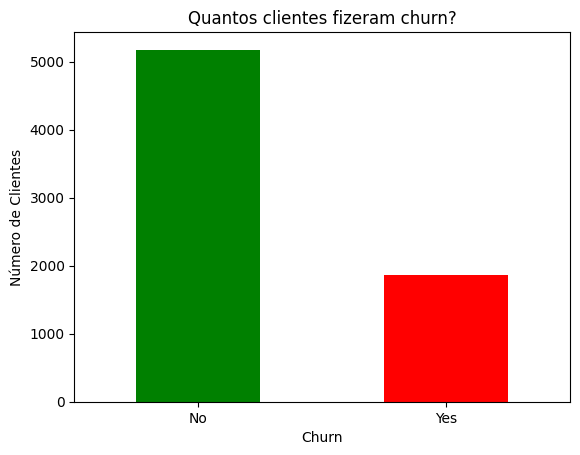

In [5]:
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

churn_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Quantos clientes fizeram churn?')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0) 
plt.show()

### 3.2 Interpretação

**Distribuição:**
- 73% dos clientes permanecem (Não)
- 27% fazem churn (Sim)

**Análise:**
- Dataset levemente desbalanceado
- Taxa de churn de 27% é significativa para o negócio
- Representa aproximadamente 1 em cada 4 clientes

---

## 4. Análise de Variáveis Numéricas

### 4.1 Identificação e Distribuição

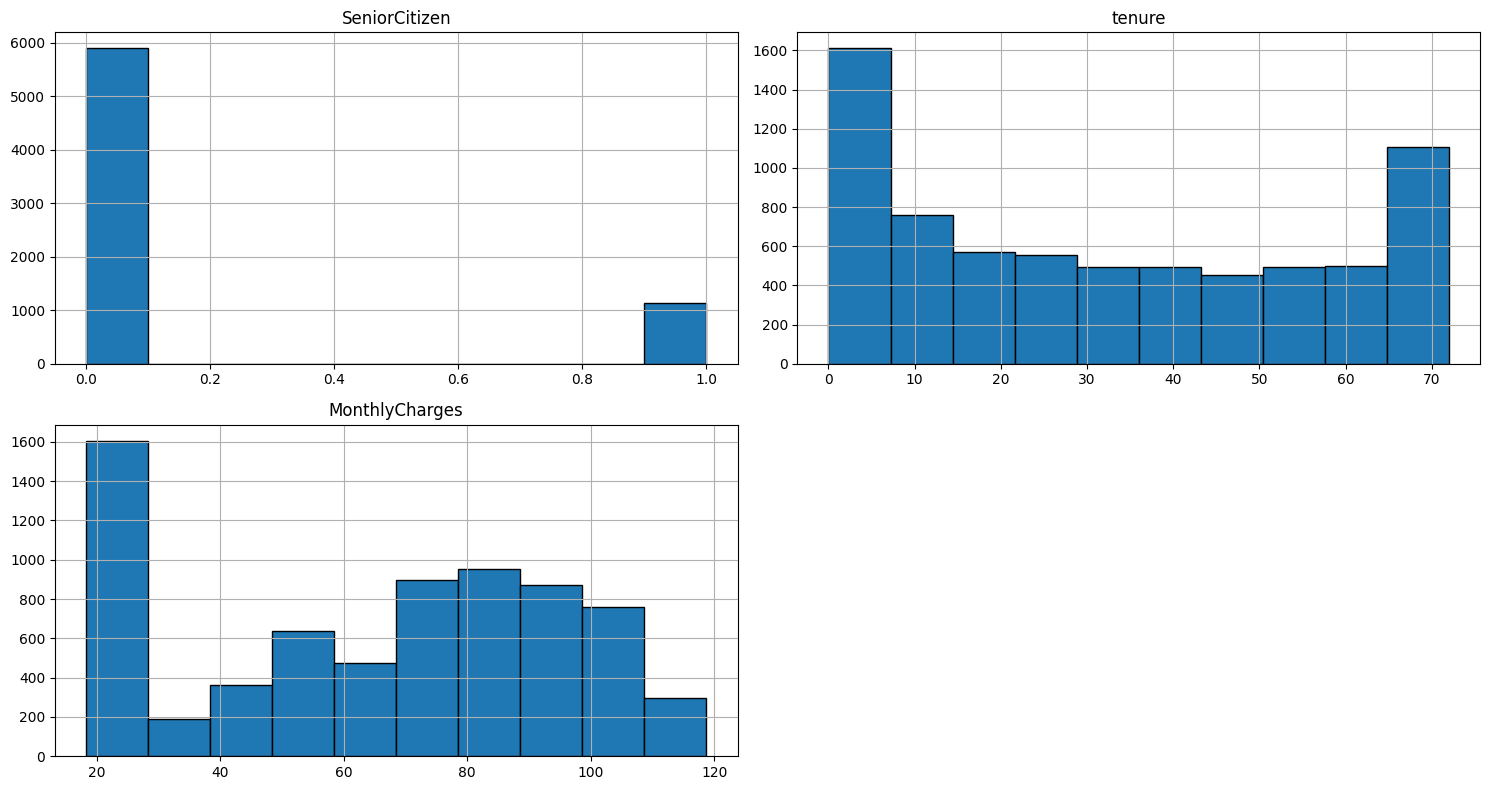

In [6]:
# Identifica colunas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Visualiza distribuição
df[numeric_cols].hist(bins=10, figsize=(15, 8), edgecolor='black')
plt.tight_layout()
plt.show()

### 4.2 Observações das Distribuições

- Temos um distribuiçao bimodal, com um pico no inicio e outro no final
- Clientes novos predominam.
- Distribuicao  Assimétrica à direita em MonthlyCharges, Clientes com a cobranca mensal media de 20 predominam.

### 4.3 Relação entre Variáveis Numéricas e Churn

#### Tenure vs Churn

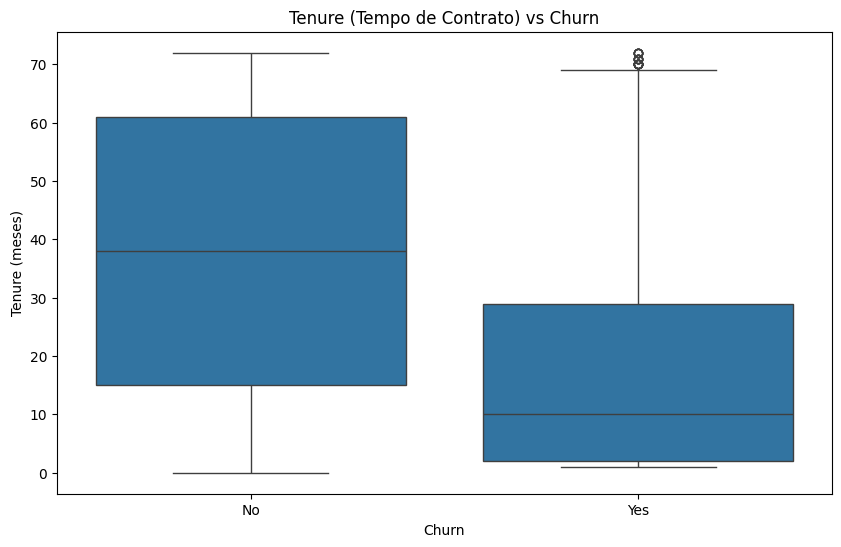

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure (Tempo de Contrato) vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses)')
plt.show()

#### MonthlyCharges vs Churn

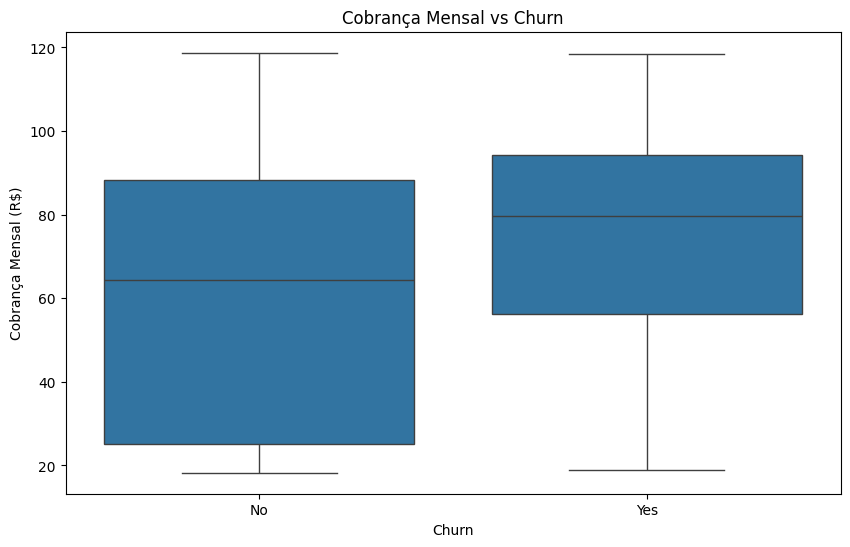

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Cobrança Mensal vs Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Mensal (R$)')
plt.show()

### 4.4 Interpretação das Variáveis Numéricas

**Colunas numéricas encontradas:**
SeniorCitizen, tenure, MonthlyCharges

**Distribuição de Tenure:**
Temos um distribuiçao bimodal, com um pico no inicio para clientes novos (0-10 meses) e muitos clientes antigos (60-72 meses). Poucos clientes na faixa média.

**Tenure vs Churn:**
Grande parte dos clientes que saem tem o tenure menor, o que indica que clientes novos tendem mais a ser churns

**MonthlyCharges vs Churn:**
Clientes que saem pagam um valor relativamente alto. Isso acontece, pois, como são novos, ainda não conheceram de fato o serviç um valor alto.

**Insights:**
1. Clientes novos (tenure < 12 meses) são o grupo de maior risco
2. Cobrar alto de clientes novos aumenta significativamente o churn
3. AÇÃO: Empresa deveria oferecer preços promocionais nos
   primeiros meses para reter novos clientes até eles perceberem valor

---

## 5. Recomendações Estratégicas para Retenção

### 5.1 Período Promocional para Novos Clientes

- Descontos nos primeiros 3-6 meses
  
Aumenta a chance de passarem da fase de teste(Fase critica de perdas)


### 5.2 Onboarding Reforçado

- Educar o cliente sobre os benefícios

Mostrar valor logo no início do servico


### 5.3 Monitoramento de Clientes em Risco

- Alerta para tenure < 6 meses + MonthlyCharges alto

Ação proativa como ligar, oferecer suporte, desconto (Atençao redobrada nesses clientes)

---

## 6. Análise de Coortes por Tenure

### 6.1 Hipóteses sobre Distribuição Bimodal

**Hipóteses levantadas:**
- **Muitos clientes novos (0-12 meses):** Alguma campanha de marketing recente
- **Muitos clientes antigos (60-72 meses):** Serviço realmente tem qualidade
- **Poucos no meio (12-24 meses):** Serviço sem promoção inicial, sem incentivo para se manter, empresa não cria vínculo inicialmente

### 6.2 Teste de Hipóteses - Taxa de Churn por Período

/var/folders/wm/rt8t_wn575169b8q43c5mrg00000gn/T/ipykernel_29439/2386845933.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()


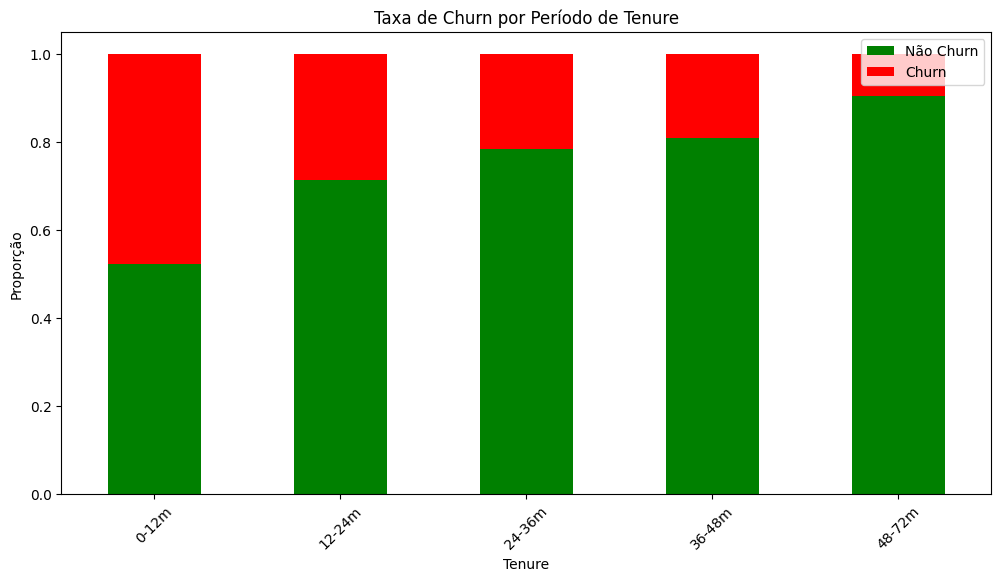

In [9]:
# Cria grupos de tenure
df['tenure_group'] = pd.cut(df['tenure'], 
                             bins=[0, 12, 24, 36, 48, 72], 
                             labels=['0-12m', '12-24m', '24-36m', '36-48m', '48-72m'])

# Calcula taxa de churn por grupo
churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()

# Visualização
churn_by_tenure.plot(kind='bar', stacked=True, figsize=(12, 6), 
                     color=['green', 'red'])
plt.title('Taxa de Churn por Período de Tenure')
plt.xlabel('Tenure')
plt.ylabel('Proporção')
plt.legend(['Não Churn', 'Churn'])
plt.xticks(rotation=45)
plt.show()

### 6.3 Programa de Retenção Proposto

Baseado na análise de coortes, propomos ações segmentadas:

#### Para clientes 0-6 meses (tenure baixo):
**Ação:** Oferta exclusiva válida apenas para a primeira assinatura - 20% off ao assinar por 6 meses

**Justificativa:** Reduz a barreira inicial de preço e cria compromisso de médio prazo

#### Para clientes 6-12 meses (ainda em risco):
**Ação:** Desconto progressivo por tempo de casa - 5% a cada 6 meses
- A partir de 6 meses: 5%
- Com 12 meses: 10%
- Limitado a 20%

**Justificativa:** Incentiva renovação contínua e cria sensação de recompensa pela fidelidade

#### Para clientes 12+ meses (começando a fidelizar):
**Ação:** Programa de indicação para clientes fiéis - a cada 3 indicados que assinarem por pelo menos 1 mês, você ganha 1 mês gratuito

**Justificativa:** Transforma clientes fiéis em vendedores da marca e reforça vínculo emocional

---

## 7. Análise de Variáveis Categóricas

### 7.1 Identificação de Variáveis Categóricas

In [10]:
# Identifica variáveis categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')

### 7.2 Tipo de Contrato vs Churn

#### Distribuição dos Tipos de Contrato

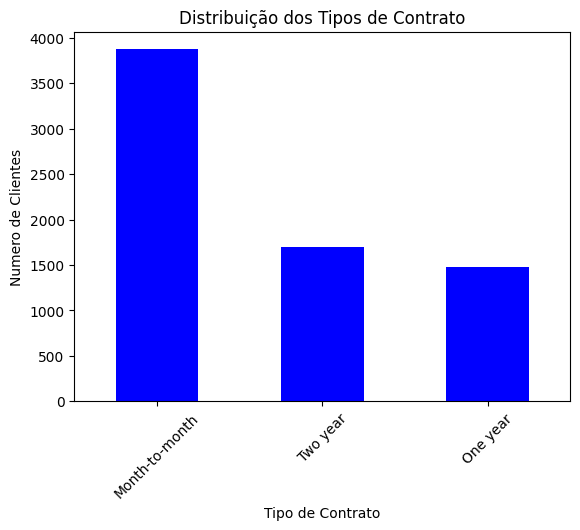

In [11]:
contract_counts = df['Contract'].value_counts()

contract_counts.plot(kind='bar', color='blue')
plt.title('Distribuição dos Tipos de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Numero de Clientes')
plt.xticks(rotation=45)
plt.show()

#### Taxa de Churn por Tipo de Contrato

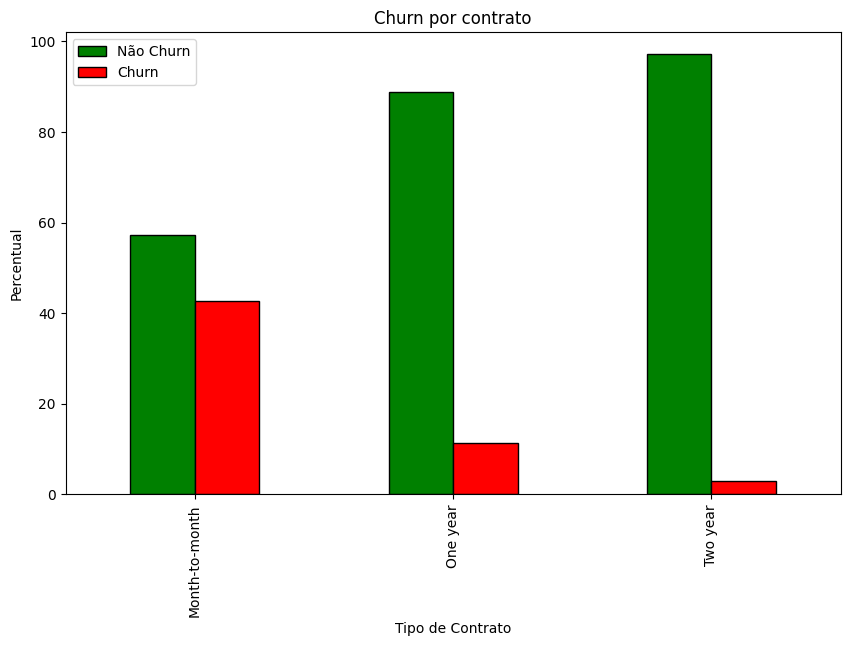

In [12]:
# Tabela cruzada: Contract vs Churn
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

contract_churn.plot(kind='bar', figsize=(10, 6),
                    color=['green', 'red'], edgecolor='black')
plt.title('Churn por contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Percentual')
plt.legend(['Não Churn', 'Churn'])
plt.show()

### 7.3 Método de Pagamento vs Churn

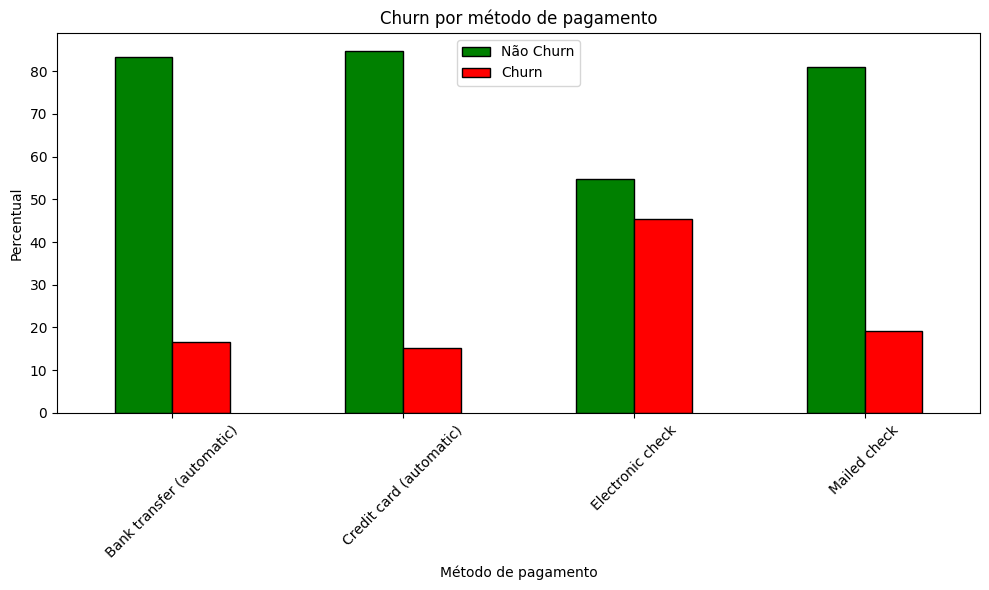

In [13]:
# Tabela cruzada: PaymentMethod vs Churn
paymant_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100

paymant_churn.plot(kind='bar', color=['green', 'red'],
                   figsize=(10, 6), edgecolor='black')
plt.title('Churn por método de pagamento')
plt.xlabel('Método de pagamento')
plt.ylabel('Percentual')
plt.legend(['Não Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 7.3 Serviços de Internet vs Churn 

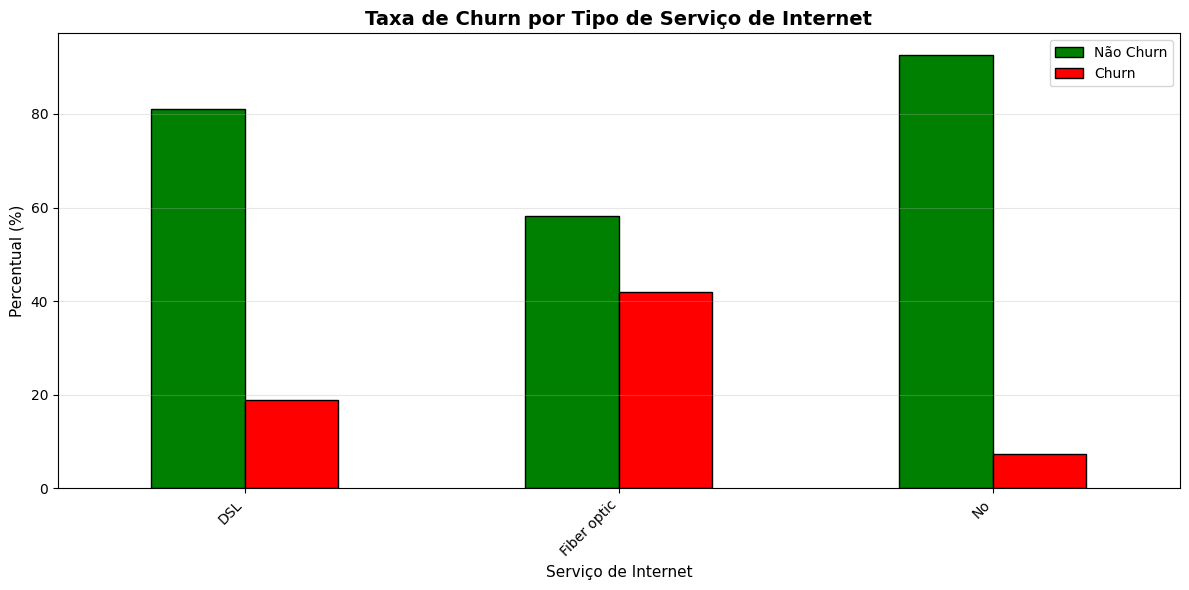

In [14]:
# Tabela cruzada serviço de internet x churn
internetService_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100

# Visualização
internetService_churn.plot(kind='bar', color=['green', 'red'],  # Verde/Vermelho é mais intuitivo
                            figsize=(12, 6), edgecolor='black')

plt.title('Taxa de Churn por Tipo de Serviço de Internet', fontsize=14, fontweight='bold')
plt.xlabel('Serviço de Internet', fontsize=11)
plt.ylabel('Percentual (%)', fontsize=11)
plt.legend(['Não Churn', 'Churn'], fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


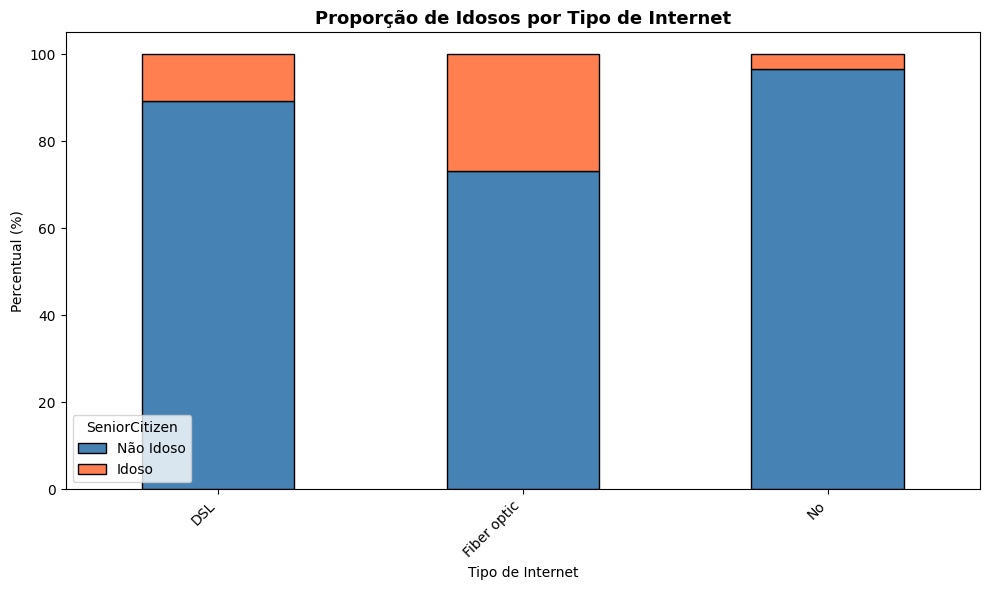

In [15]:
# Idosos por tipo de internet
internet_senior = pd.crosstab(df['InternetService'], df['SeniorCitizen'], normalize='index') * 100

internet_senior.plot(kind='bar', stacked=True, figsize=(10, 6), 
                     color=['steelblue', 'coral'], edgecolor='black')
plt.title('Proporção de Idosos por Tipo de Internet', fontweight='bold', fontsize=13)
plt.xlabel('Tipo de Internet')
plt.ylabel('Percentual (%)')
plt.legend(['Não Idoso', 'Idoso'], title='SeniorCitizen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Análise CRÍTICA: Churn de idosos vs não-idosos dentro de Fiber Optic
fiber_clients = df[df['InternetService'] == 'Fiber optic'].copy()

fiber_senior_churn = pd.crosstab(fiber_clients['SeniorCitizen'], 
                                  fiber_clients['Churn'], 
                                  normalize='index') * 100

### 7.3.1 Interpretação - Tipo de Internet

**Principais descobertas:**
- **Fiber optic:** 42% de churn
- **DSL:** ~25% de churn
- **No internet service:** 7% de churn (3x menor que DSL)
- **Diferença total:** 35% entre maior e menor

**Por que Fiber Optic tem alto churn?**

**Custo-benefício**
  - Preço elevado gera expectativa alta
  - Qualquer insatisfação = propensão ao cancelamento

**Mercado altamente competitivo**
  - Concorrentes fazem ofertas agressivas
  - Facilidade de troca entre operadoras

**Perfil Conservador**
  - 42% dos clientes Fiber são idosos (SeniorCitizen)
  - **Idosos com Fiber: 47.3% de churn** vs não-idosos: 39.9%
  - Complexidade técnica (configuração, wi-fi, apps) gera frustração

**Análise: Por que "No internet" tem baixo churn?**

**Perfil conservador e estável**
  - Apenas telefone fixo (necessidade básica)
  - Maior inércia para mudanças

**Simplicidade do serviço**
  - Baixa expectativa, difícil decepcionar
  - Poucos pontos de falha

**Preço acessível**
  - Baixa sensibilidade a variações de custo

**Ações de negócio:**

**CRÍTICO - Idosos + Fiber (47.3% churn):**
1. Programa "Fiber Sênior": instalação assistida + treinamento presencial
2. Plano intermediário com preço ajustado -20% para perfil idoso
3. Suporte técnico prioritário e especializado
4. Opção de downgrade Fiber DSL sem multa nos primeiros 6 meses

**Para Fiber em geral:**
1. SLA rigoroso de qualidade (velocidade garantida)
2. Programa de fidelidade agressivo (descontos progressivos)
3. Comunicação clara de diferenciais vs concorrentes

**Para "No internet":**
1. Manter preços competitivos
2. Não forçar update (risco de gerar churn desnecessário)

### 7.4 Serviços de Telefone vs Churn

In [17]:
phone_vars = ['PhoneService', 'MultipleLines']

In [18]:
# Análise cruzada (PhoneService)
ac_phoneService = pd.crosstab(df['PhoneService'], df['Churn'], normalize='index') * 100

# Análise cruzada (PhoneService)
ac_multipleLines = pd.crosstab(df['MultipleLines'], df['Churn'], normalize='index') * 100

### 7.4.1 Interpretação - Serviços de Telefone

**Resultado:** Variáveis de telefone não apresentam impacto significativo no cancelamento de clientes (diferença de 5% entre as categorias)

**Conclusão:**
- PhoneService e MultipleLines não são determinantes para churn
- Não necessitam ações da empresa
- Podem ser mantidas no modelo, porem, com baixa prioridade

### 7.5 Variáveis Demográficas

In [19]:
demo_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for var in demo_columns:
    # Análise Cruzada
    ac = pd.crosstab(df[var], df['Churn'], normalize='index') * 100
    
    # churn_rate
    churn_rate = df.groupby(var)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)

    # Impacto
    impacto = churn_rate.max() - churn_rate.min()

    print(f"{var:20s} → Impacto: {impacto:5.1f}%")  
    
    

gender               → Impacto:   0.8%
SeniorCitizen        → Impacto:  18.1%
Partner              → Impacto:  13.3%
Dependents           → Impacto:  15.8%


#### Interpretação

- A variável gender é irrelevante para o modelo

### 7.5.1 Visualização

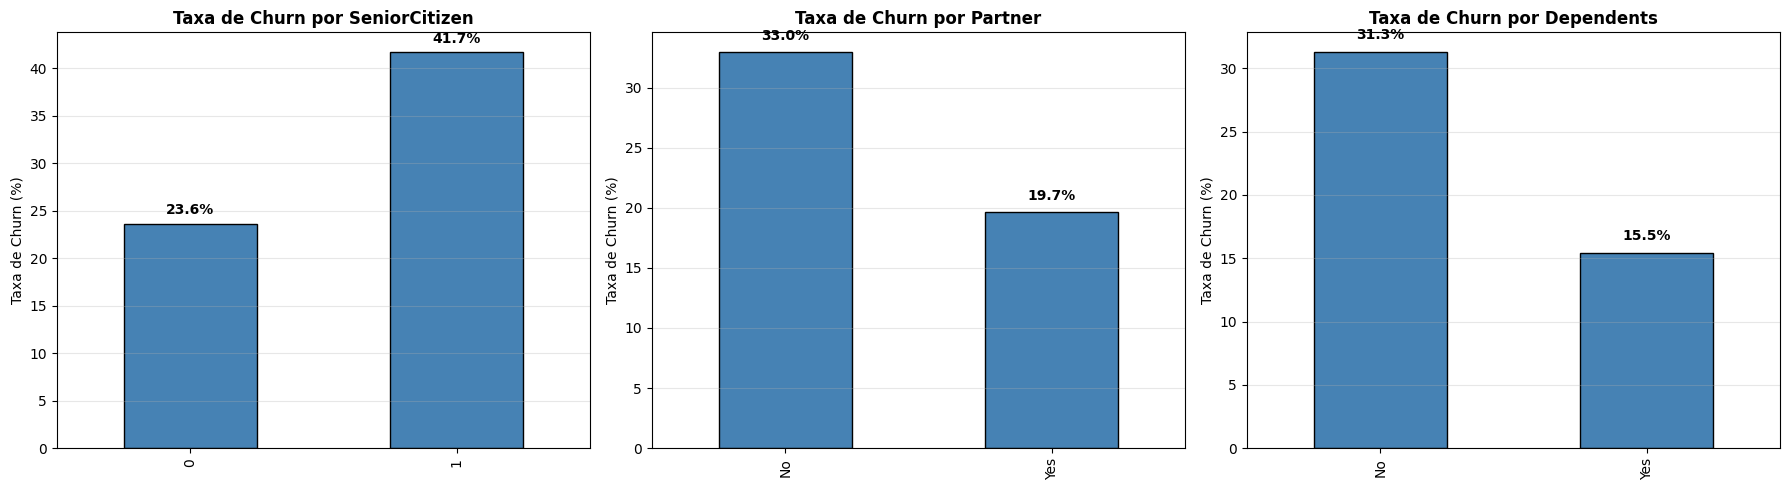

In [20]:
important_vars = ['SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(important_vars):
    churn_rate = df.groupby(var)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    
    churn_rate.plot(kind='bar', ax=axes[i], color='steelblue', edgecolor='black')
    
    axes[i].set_title(f'Taxa de Churn por {var}', fontweight='bold')
    axes[i].set_ylabel('Taxa de Churn (%)')
    axes[i].set_xlabel('')
    axes[i].grid(axis='y', alpha=0.3)
    
    # Adiciona valores nas barras
    for idx, value in enumerate(churn_rate):
        axes[i].text(idx, value + 1, f'{value:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 7.5.1 Interpretação - Variáveis Demográficas

**Principais descobertas:**
- **SeniorCitizen:** Idosos têm 41.7% de churn vs 23.6% não-idosos (quase o dobro!)
- **Partner:** Sem parceiro = 33.0% churn vs Com parceiro = 19.7% (-13.3 p.p.)
- **Dependents:** Sem dependentes = 31.3% vs Com dependentes = 15.5% (-15.8 p.p.)
- **gender:** Impacto negligível (0.8%) - não é fator determinante

**Análise de causa raiz:**

**Por que idosos têm churn tão alto?**
1. **Menor urgência/dependência tecnológica:** Conseguem viver com menos conectividade
2. **Importancia ao preço:** Renda fixa (aposentadoria) gera foco em economia
3. **Dificuldade Tecnológi:** Dificuldade com configuração e uso (já comprovado na análise Fiber x Idosos)
4. **Combinação letal:** Idosos + Fiber Optic = 47.3% de churn (visto em 7.3)

**Por que parceiro/dependentes reduzem churn?**

1. **Necessidade ampliada:** Crianças precisam de internet para escola/entretenimento
2. **Inércia de decisão:** Trocar operadora afeta múltiplas pessoas = mais trabalho
3. **Renda combinada:** Maior capacidade financeira reduz sensibilidade ao preço
   
**Ações de negócio:**

**PRIORIDADE - Segmento Idosos (41.7% churn):**
1. Tutorial presencial e material didático simplificado
2. Suporte técnico prioritário e especializado (linha exclusiva)
3. Comunicação clara de benefícios (menos jargão técnico)
4. Planos ajustados ao perfil (menor velocidade, menor preço)

**Para clientes sem parceiro/dependentes (alto risco):**
1. Campanha "Conecte-se Mais" com 20-30% desconto nos primeiros 3 meses
2. Benefícios adicionais (streaming, cloud storage) para aumentar valor percebido
3. Programa de fidelidade agressivo com recompensas individuais

**Para famílias (baixo churn - reforçar):**
1. Plano Família com desconto progressivo por pessoa
2. Controle parental e recursos educacionais inclusos
3. Marketing focado em "conectar a família"

### 7.6 Variávies Faltantes

In [22]:
# Todas as categóricas
all_categorical = df.select_dtypes(include=['object']).columns.tolist()
all_categorical.remove('Churn')

analisadas = ['Contract', 'PaymentMethod', 'InternetService', 
            'PhoneService', 'MultipleLines',
            'gender', 'SeniorCitizen', 'Partner', 'Dependents']

if 'customerID' in all_categorical:
    all_categorical.remove('customerID')

sobra = [var for var in all_categorical if var not in analisadas]

print(f"Variáveis restantes: {sobra}")

Variáveis restantes: ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'TotalCharges']


**Nota sobre serviços de internet:**
Variáveis de serviços individuais (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) não foram analisadas isoladamente pois são condicionais a InternetService (já analisado). Todas contêm a categoria "No internet service" que distorce a análise individual.


### 7.6.1 PaperlessBilling vs Churn

In [28]:
ac_ppb = pd.crosstab(df['PaperlessBilling'], df['Churn'], normalize='index') * 100

Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092


### 7.6.2 PaperlessBilling vs Contract

In [32]:
ac_ppb_contract = pd.crosstab(df['PaperlessBilling'], df['Contract'], normalize='index') * 100

ac_ppb_contract

Contract,Month-to-month,One year,Two year
PaperlessBilling,,,
No,44.881616,23.433148,31.685237
Yes,61.999520,19.180053,18.820427


#### Conclusão

**Descoberta inicial:**
- Clientes com conta digital: 33.6% de churn
- Clientes com conta em papel: 16.3% de churn
- **Diferença: 17.3%**

**Análise de causa raiz:**

Descobrimo que **62% dos clientes com conta digital têm contrato Month-to-month** e apenas 45% dos clientes com conta em papel.

O alto churn de PaperlessBilling é um **efeito indireto** do tipo de contrato:
- PaperlessBilling está **correlacionado** com Contract Month-to-month
- Month-to-month é o verdadeiro driver de churn (57% de taxa)
- PaperlessBilling por si só não causa churn, apenas indica perfil de cliente

**Hipóteses**
1. Facilidade de cancelamento online reduz fricção
2. Perfil digital busca ativamente ofertas de concorrentes
3. Menor engajamento físico com a marca

**Ação de negócio:**
- Não criar campanhas específicas para PaperlessBilling
- **Foco real:** Migrar clientes Month-to-month para contratos longos (já identificado em 7.2)
- Incentivar conta digital para reduzir custos operacionais SEM medo de aumentar churn (o problema é o contrato, não a conta)

### 7.7 Resumo: Ranking Geral de Impacto

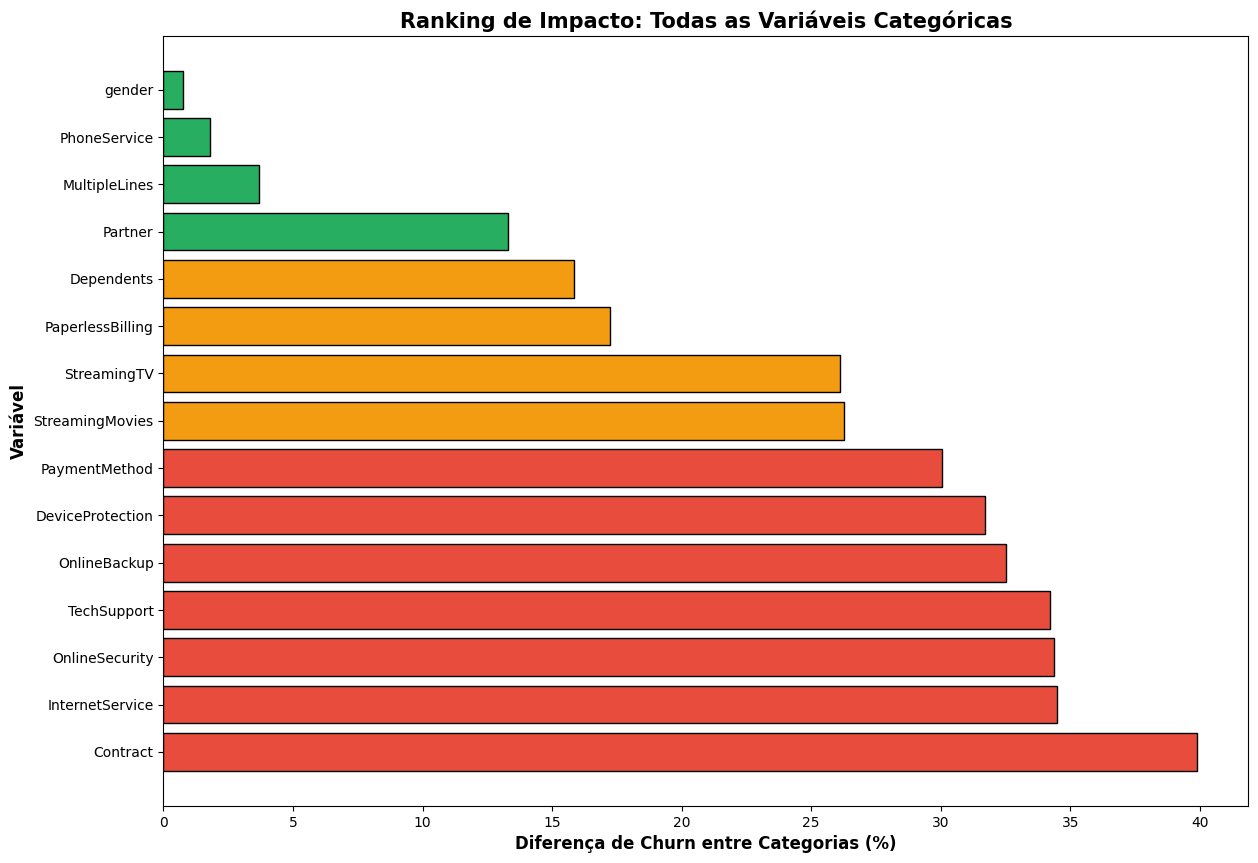

In [38]:
# Lista TODAS as categóricas (exceto Churn e customerID)
all_categorical = df.select_dtypes(include=['object']).columns.tolist()
all_categorical.remove('Churn')
if 'customerID' in all_categorical:
    all_categorical.remove('customerID')

if 'TotalCharges' in all_categorical:  
    all_categorical.remove('TotalCharges')

# Calcula impacto de cada uma
complete_ranking = {}

for col in all_categorical:
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes'). sum() / len(x) * 100 )
    impact = churn_rate.max() - churn_rate.min()
    complete_ranking[col] = impact

complete_ranking = dict(sorted(complete_ranking.items(), key=lambda x: x[1], reverse=True))

# Gráficos
plt.figure(figsize=(14, 10))
variables = list(complete_ranking.keys())
impacts = list(complete_ranking.values())

colors = ['#e74c3c' if x > 30 else '#f39c12' if x > 15 else '#27ae60' for x in impacts]

plt.barh(variables, impacts, color=colors, edgecolor='black')
plt.xlabel('Diferença de Churn entre Categorias (%)', fontsize=12, fontweight='bold')
plt.ylabel('Variável', fontsize=12, fontweight='bold')
plt.title('Ranking de Impacto: Todas as Variáveis Categóricas', fontsize=15, fontweight='bold')
plt.show()

#### 7.7.1 Conclusões Gerais - Análise Categórica Completa

**TOP 5 Variáveis Mais Impactantes:**

1. **Contract** - 40% de diferença
   - Modelo de contrato é a variável mais impactante, clientes Month-to-month têm 57% de churn vs contratos longos com 10%

2. **InternetService** - 35%
   - Tipo de conexão impacta: clientes Fiber optic tem 42% de churn, sendo crítico quando combinado com perfil idoso (47.3%)

3. **OnlineSecurity** - 35%
   - Clientes SEM segurança online têm churn significativamente maior (indica menor percepção de valor nos serviços)

4. **TechSupport** - 34%
   - Ausência de suporte técnico influencia o alto churn (reforça importância de assistência, especialmente para perfis menos tech-savvy)

5. **OnlineBackup** - 33%
   - Similar a OnlineSecurity: clientes sem serviços adicionais percebem menos valor

**Padrão identificado no TOP 5:**

**4 das TOP 5 variáveis estão relacionadas a SERVIÇOS DE INTERNET!**
- Contract (tipo de compromisso)
- InternetService (tipo de conexão)
- OnlineSecurity, TechSupport, OnlineBackup (serviços adicionais)

**Insight:** O churn está fortemente concentrado em questões relacionadas à **internet e serviços digitais**. Clientes insatisfeitos com conectividade/serviços tendem a cancelar.

**Variáveis de pouco impacto (<5%):**

- **gender** (0.8%)
- **PhoneService** (2.1%)
- **MultipleLines** (3.5%)

**Implicação para modelagem:** 
Estas variáveis têm poder preditivo muito baixo e podem ser removidas do modelo final para reduzir complexidade sem perda significativa de performance. Gender, especificamente, pode ser desconsiderado completamente

### 7.4 Análise de Variáveis Categóricas

#### Contract vs Churn

**Tipo com maior churn:** Contrato Mês a Mês (57% de taxa de churn)

**Tipo com menor churn:** Contrato de 2 anos

**Interpretação:**
- Contratos mês a mês servem apenas para suprir curiosidade inicial
- Não permitem ao cliente conhecer totalmente o serviço
- Falta de compromisso de longo prazo aumenta propensão ao cancelamento

**Ação de negócio:**
- Ações de marketing e onboarding reforçado (tutorial, suporte prioritário)
- Aumentar percepção de valor para influenciar cliente a iniciar com contrato de maior duração
- Incentivos para migração de Month-to-month para contratos anuais/bianuais

#### PaymentMethod vs Churn

**Método com maior churn:** Cheque eletrônico

**Interpretação:**
- Método de pagamento mais complicado gera incômodo na hora de pagar
- Cada pagamento manual é uma oportunidade de repensar a assinatura
- Falta de automação aumenta fricção

**Ação de negócio:**
- Oferecer parcelamento sem juros para cartão de crédito
- Desconto de 10% para transferência bancária
- Campanha educativa sobre débito automático ("pague e esqueça")

---

## 8. Segmentação de Clientes de Alto Risco

### 8.1 Perfil Combinado de Alto Risco

- Contrato Month-to-month
- Pagamento via cheque eletrônico
- Tenure < 12 meses
- MonthlyCharges > $70

In [ ]:
# Filtra clientes de alto risco
high_risk = df[
    (df['Contract'] == 'Month-to-month') &
    (df['PaymentMethod'] == 'Electronic check') &
    (df['tenure'] < 12) &
    (df['MonthlyCharges'] > 70)
]

# Calcula taxa de churn nesse grupo
churn_rate_high_risk = high_risk['Churn'].value_counts(normalize=True) * 100

print('Taxa de churn para clientes de alto risco:')
print(churn_rate_high_risk)
print(f"\nTotal de clientes neste perfil: {len(high_risk)}")

---

## 9. Análise de Correlações

In [ ]:
# Seleciona variáveis numéricas para correlação
numeric_data = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()

# Converte TotalCharges para numérico (caso necessário)
numeric_data['TotalCharges'] = pd.to_numeric(numeric_data['TotalCharges'], errors='coerce')

# Calcula matriz de correlação
correlation = numeric_data.corr()

# Visualização
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()

### 9.1 Interpretação das Correlações

**tenure e TotalCharges têm correlação alta?**
- Sim (0.83), pois se tenure sobe, TotalCharges também deve subir
- Correlação forte e esperada

**MonthlyCharges e TotalCharges têm correlação?**
- Sim (0.65), correlação moderada
- TotalCharges é influenciado pela multiplicação de MonthlyCharges por tenure
- Se qualquer uma das duas variáveis sobe, TotalCharges também sobe

**Implicação para modelagem:**
- TotalCharges pode ser redundante (multicolinearidade)
- Tenure + MonthlyCharges já explicam grande parte de TotalCharges
- Considerar remover TotalCharges na fase de feature engineering

# 10 Identificar TODAS as variáveis categóricas

---

## 10. Conclusões e Próximos Passos

### 10.1 Principais Descobertas

#### Perfil de Alto Risco 
- **Contrato:** Month-to-month (57% de churn)
- **Tenure:** < 12 meses (clientes novos)
- **MonthlyCharges:** > $70 (valores altos)
- **PaymentMethod:** Cheque eletrônico
- **Taxa de churn combinada:** Verificada na análise de segmentação

#### Impacto Financeiro
- **Taxa atual de churn:** 27% (1 em cada 4 clientes)
- **Clientes perdidos:** ~1.900 anualmente
- **Estimativa de perda:** R$ 1,5M em receita anual

#### Fatores Críticos Identificados
1. **Tenure:** Primeiros 12 meses são críticos - "zona da morte"
2. **Tipo de contrato:** Month-to-month é extremamente volátil
3. **Preço:** Valores altos sem percepção de valor = churn
4. **Método de pagamento:** Fricção no pagamento aumenta propensão ao cancelamento

### 10.2 Recomendações Estratégicas

#### Curto Prazo (0-3 meses)
1. ✅ Implementar desconto de 20% para novos clientes nos primeiros 6 meses
2. ✅ Campanha de migração de cheque eletrônico para débito automático
3. ✅ Sistema de alerta para clientes de alto risco

#### Médio Prazo (3-6 meses)
1. ✅ Programa de onboarding estruturado
2. ✅ Desconto progressivo por tempo de casa
3. ✅ Incentivos para migração de Month-to-month para contratos longos

#### Longo Prazo (6-12 meses)
1. ✅ Programa de indicação para clientes fiéis
2. ✅ Modelo preditivo de churn em produção
3. ✅ Sistema automatizado de retenção

### 10.3 Próximos Passos

**Feature Engineering:**
- [ ] Criar variáveis derivadas (ex: TotalCharges_per_month)
- [ ] Encoding de variáveis categóricas
- [ ] Tratamento de multicolinearidade
- [ ] Normalização/padronização de features numéricas

**Modelagem:**
- [ ] Baseline: Regressão Logística (interpretabilidade)
- [ ] Ensemble: Random Forest, XGBoost
- [ ] Avaliar com métricas apropriadas: Precision, Recall, F1-Score, ROC-AUC
- [ ] Aplicar class weights para lidar com desbalanceamento

**Avaliação e Deploy:**
- [ ] Validação cruzada
- [ ] Análise de feature importance
- [ ] Criação de pipeline de predição
- [ ] Documentação para deploy

---

## Fim da Análise Exploratória